# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# A base de dados 'tips' é nativa do pacote Seaborn e foi criada para fins didáticos.
# Ela contém dados simulados sobre gorjetas em um restaurante, com variáveis que
# permitem analisar a relação entre o valor da gorjeta e fatores como o valor da conta,
# sexo do cliente, se ele era fumante ou não, e o dia da semana.

# Carregar a base de dados
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
# Definir as variáveis dependente e independente
X = tips['total_bill']
y = tips['tip']

# Adicionar uma constante para o termo de interceptação no modelo de regressão
X = sm.add_constant(X)

In [3]:
# Regressão linear
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           6.69e-34
Time:                        11:56:47   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

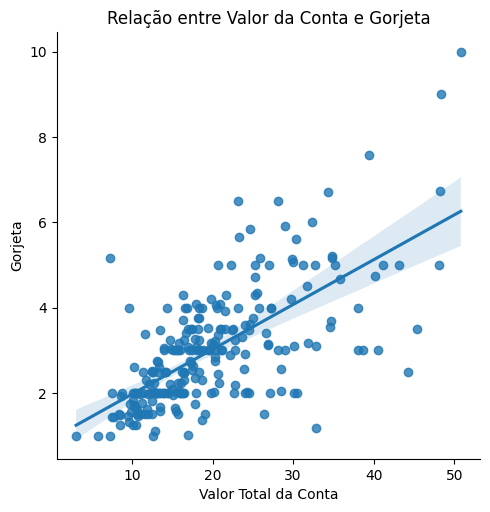

In [4]:
# Gráfico de dispersão
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.xlabel('Valor Total da Conta')
plt.ylabel('Gorjeta')
plt.title('Relação entre Valor da Conta e Gorjeta')
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           5.85e-08
Time:                        12:15:30   Log-Likelihood:                -772.37
No. Observations:                 244   AIC:                             1549.
Df Residuals:                     242   BIC:                             1556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6766      0.900     22.975      0.0

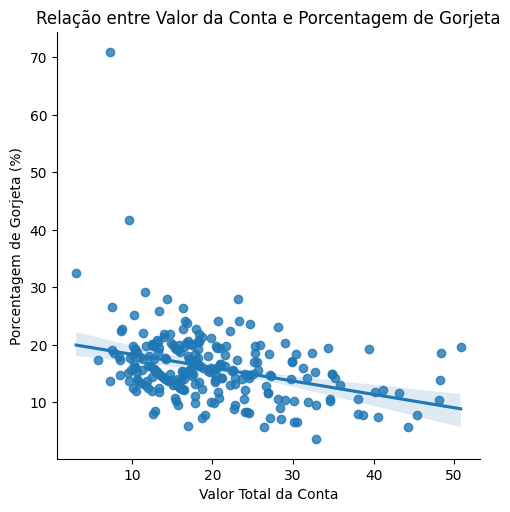

In [7]:
# Carregando a base de dados 'tips'
tips = sns.load_dataset('tips')

# Criando a variável 'tip_pct' (porcentagem de gorjeta)
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100  # Multiplicando por 100 para ter a porcentagem

# Definindo as variáveis dependente (tip_pct) e independente (total_bill)
X = tips['total_bill']
y = tips['tip_pct']

# Adicionando uma constante ao modelo (necessário para a regressão)
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibindo o resumo da regressão
print(model.summary())

# Criando o gráfico de dispersão
sns.lmplot(x='total_bill', y='tip_pct', data=tips)
plt.xlabel('Valor Total da Conta')
plt.ylabel('Porcentagem de Gorjeta (%)')
plt.title('Relação entre Valor da Conta e Porcentagem de Gorjeta')
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

# Comparação de Regressão das Gorjetas

Comparando os dois modelos de regressão para entender a relação entre o valor total da conta e a gorjeta em um restaurante podemos perceber que:

## Modelos Analisados

### 1. Modelo para Gorjeta em Dólares (`tip`)
- **R-squared**: 0.457
  - **Significado**: 45.7% da variação na gorjeta é explicada pelo total da conta.
- **Coeficiente de `total_bill`**: 0.1050
  - **Interpretação**: Um aumento de $1 na conta resulta em um aumento de cerca de $0.11 na gorjeta.
- **Significância**: Muito significativa (p < 0.001).

### 2. Modelo para Porcentagem de Gorjeta (`tip_pct`)
- **R-squared**: 0.115
  - **Significado**: Apenas 11.5% da variação na porcentagem da gorjeta é explicada pelo total da conta.
- **Coeficiente de `total_bill`**: -0.2323
  - **Interpretação**: Um aumento de $1 na conta diminui a porcentagem de gorjeta em cerca de 0.23%.
- **Significância**: Muito significativa (p < 0.001).

## Comparação dos Resultados

- **Gorjeta em Dólares**: Relação forte e direta com o total da conta.
- **Porcentagem de Gorjeta**: Relação fraca e inversa com o total da conta.

## Conclusão
Os resultados mostram que os clientes tendem a dar gorjetas maiores em valor absoluto conforme o total da conta aumenta, mas a porcentagem da gorjeta diminui em contas mais altas. A gorjeta em dólares é uma medida mais útil para entender o comportamento dos clientes.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [8]:
# Ajustar o modelo de regressão para tip_pct
X = tips[['total_bill']]
X = sm.add_constant(X)  # Adicionando a constante ao modelo
y_tip_pct = tips['tip_pct']
model_tip_pct = sm.OLS(y_tip_pct, X).fit()

# Obter os valores preditos para tip_pct
tips['pred_tip_pct'] = model_tip_pct.fittedvalues

# Calcular o valor predito para tip usando tip_pct e total_bill
tips['pred_tip'] = tips['pred_tip_pct'] * tips['total_bill']

# Calcular o R² para o modelo de tip
R_squared_tip = model_tip_pct.rsquared

# Exibir resultados
print("Valores preditos para tip_pct:")
print(tips[['total_bill', 'tip_pct', 'pred_tip_pct']].head())

print("\nValores preditos para tip:")
print(tips[['total_bill', 'tip', 'pred_tip']].head())

print("\nR² para o modelo de tip_pct:", R_squared_tip)

# Comparar R² com o do modelo para tip (do item 1)
R_squared_tip_original = 0.457  # R² do modelo original para tip
print("R² original para tip:", R_squared_tip_original)
print("Diferença em R²:", R_squared_tip_original - R_squared_tip)

Valores preditos para tip_pct:
   total_bill    tip_pct  pred_tip_pct
0       16.99   5.944673     16.729762
1       10.34  16.054159     18.274574
2       21.01  16.658734     15.795907
3       23.68  13.978041     15.175659
4       24.59  14.680765     14.964264

Valores preditos para tip:
   total_bill   tip    pred_tip
0       16.99  1.01  284.238664
1       10.34  1.66  188.959091
2       21.01  3.50  331.871999
3       23.68  3.31  359.359609
4       24.59  3.61  367.971251

R² para o modelo de tip_pct: 0.11466627091820403
R² original para tip: 0.457
Diferença em R²: 0.342333729081796


Análise da Relação entre o Total da Conta e as Gorjetas em um Restaurante

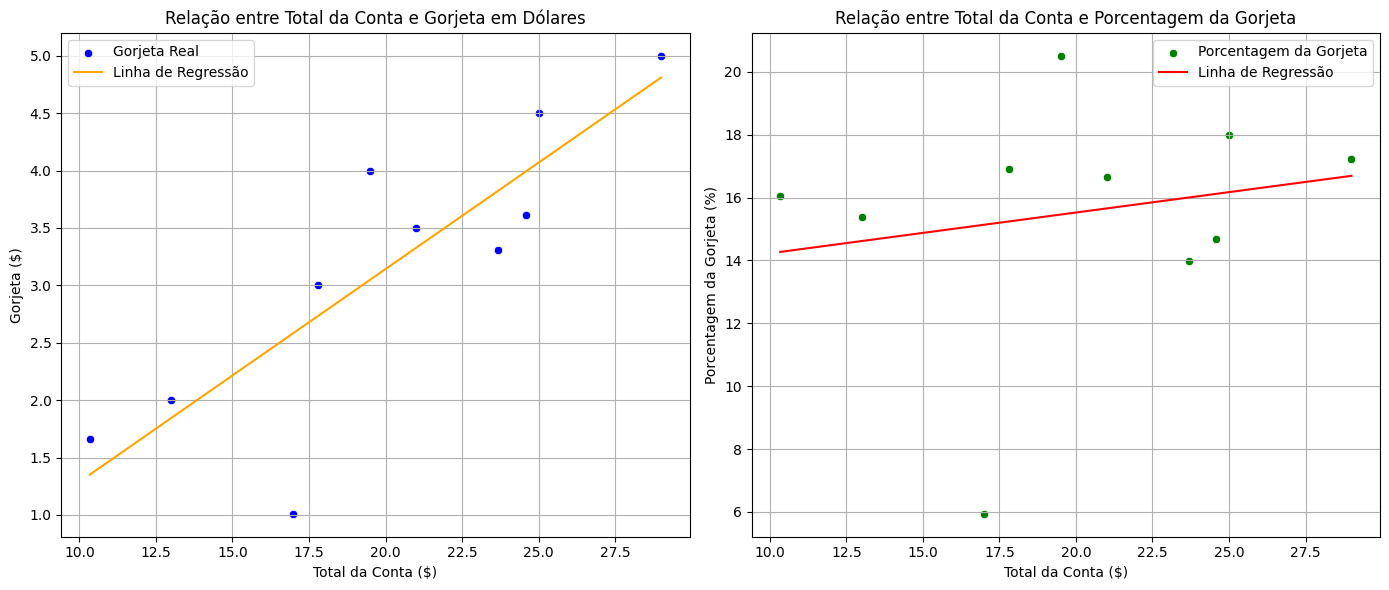

In [12]:
# Dados
data = {
    'total_bill': [16.99, 10.34, 21.01, 23.68, 24.59, 13.00, 29.00, 19.50, 17.80, 25.00],
    'tip': [1.01, 1.66, 3.50, 3.31, 3.61, 2.00, 5.00, 4.00, 3.00, 4.50],
    'tip_pct': [5.94, 16.05, 16.66, 13.98, 14.68, 15.38, 17.24, 20.51, 16.91, 18.00]
}
df = pd.DataFrame(data)

# Criar modelos de regressão
# Modelo para gorjeta em dólares
X_tip = sm.add_constant(df['total_bill'])  # Adiciona uma constante
model_tip = sm.OLS(df['tip'], X_tip).fit()  # Ajusta o modelo
df['pred_tip'] = model_tip.predict(X_tip)  # Previsões da gorjeta

# Modelo para porcentagem de gorjeta
X_tip_pct = sm.add_constant(df['total_bill'])  # Adiciona uma constante
model_tip_pct = sm.OLS(df['tip_pct'], X_tip_pct).fit()  # Ajusta o modelo
df['pred_tip_pct'] = model_tip_pct.predict(X_tip_pct)  # Previsões da porcentagem de gorjeta

# Configuração do gráfico
plt.figure(figsize=(14, 6))

# Gráfico da gorjeta em dólares
plt.subplot(1, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=df, label='Gorjeta Real', color='blue')
sns.lineplot(x='total_bill', y='pred_tip', data=df, label='Linha de Regressão', color='orange')
plt.title('Relação entre Total da Conta e Gorjeta em Dólares')
plt.xlabel('Total da Conta ($)')
plt.ylabel('Gorjeta ($)')
plt.legend()
plt.grid(True)

# Gráfico da porcentagem de gorjeta
plt.subplot(1, 2, 2)
sns.scatterplot(x='total_bill', y='tip_pct', data=df, label='Porcentagem da Gorjeta', color='green')
sns.lineplot(x='total_bill', y='pred_tip_pct', data=df, label='Linha de Regressão', color='red')
plt.title('Relação entre Total da Conta e Porcentagem da Gorjeta')
plt.xlabel('Total da Conta ($)')
plt.ylabel('Porcentagem da Gorjeta (%)')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Análise dos Resultados de Regressão

## 1. Modelo de Regressão para Gorjeta em Dólares (tip)

- **Variável Dependente:** Gorjeta (tip)
- **R² (R-quadrado):** 0.457
  - **Interpretação:** Aproximadamente 45,7% da variação nas gorjetas é explicada pelo valor total da conta (total_bill). Isso indica uma relação moderada a forte entre as variáveis.
- **Coeficiente para total_bill:** 0.1050
  - **Interpretação:** Para cada aumento de $1 no total da conta, a gorjeta aumenta em média $0,105. Isso sugere que os clientes tendem a deixar gorjetas mais altas em contas maiores.
- **Significância:** O valor de p é menor que 0.001, indicando que a relação entre o total da conta e a gorjeta é estatisticamente significativa.

## 2. Modelo de Regressão para Porcentagem de Gorjeta (tip_pct)

- **Variável Dependente:** Porcentagem da Gorjeta (tip_pct)

- **R²:** 0.115
  - **Interpretação:** Apenas 11,5% da variação na porcentagem de gorjeta é explicada pelo total da conta, sugerindo uma relação mais fraca em comparação com o modelo de gorjeta em dólares.

- **Coeficiente para total_bill:** -0.2323
  - **Interpretação:** Para cada aumento de $1 na conta, a porcentagem de gorjeta diminui em média 0,232%. Isso indica que, em contas mais altas, os clientes tendem a deixar uma porcentagem menor de gorjeta.

- **Significância:** Assim como no modelo anterior, o valor de p é menor que 0.001, confirmando que esta relação também é estatisticamente significativa.

## Comparação dos Modelos

| Aspecto                         | Gorjeta em Dólares (tip) | Porcentagem da Gorjeta (tip_pct) |
|--------------------------------|---------------------------|-----------------------------------|
| **R²**                         | 0.457                     | 0.115                             |
| **Relação**                   | Direta e forte            | Inversa e fraca                   |
| **Coeficiente total_bill**     | 0.1050                    | -0.2323                           |

## Conclusão

- **Gorjeta em Dólares:** A análise revela que há uma relação forte e positiva entre o total da conta e a gorjeta em dólares, indicando que, à medida que o total da conta aumenta, a gorjeta também tende a aumentar.

- **Porcentagem da Gorjeta:** Em contraste, a porcentagem da gorjeta diminui à medida que o total da conta aumenta. Isso sugere que, em contas mais altas, os clientes tendem a dar uma porcentagem menor, apesar do valor absoluto da gorjeta ser maior.

- **Utilidade dos Modelos:** Os resultados indicam que o valor absoluto da gorjeta (em dólares) é uma métrica mais útil para compreender o comportamento dos clientes do que a porcentagem, especialmente em transações de maior valor.

## Valores Preditos e R² Comparativo

- Os valores preditivos foram obtidos para ambos os modelos, permitindo uma análise mais profunda dos padrões de gorjeta. O R² para o modelo de tip_pct foi calculado como 0.1147, que é consideravelmente inferior ao R² original de 0.457 para o modelo de tip. A diferença de 0.3423 demonstra a maior eficácia do modelo de gorjeta em dólares em explicar a variação nas gorjetas.
